# Homework 1: Thinking About Data

BEE 4850/5850

**Name**:

**ID**:

> **Due Date**
>
> Friday, 2/7/25, 9:00pm

## Overview

### Instructions

The goal of this homework assignment is to introduce you to
simulation-based data analysis.

-   Problem 1 asks you to find an example of a spurious correlation.
-   Problem 2 asks you to explore whether a difference between data
    collected from two groups might be statistically meaningful or the
    result of noise. This problem repeats the analysis from [Statistics
    Without The Agonizing
    Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o) by John Rauser
    (which is a neat watch!).
-   Problem 3 asks you to explore the impacts of selection biases on
    statistical relationships.
-   Problem 4 asks you to evaluate an interview method for finding the
    level of cheating on a test to determine whether cheating was
    relatively high or low. This problem was adapted from [Bayesian
    Methods for
    Hackers](https://dataorigami.net/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/).
-   Problem 5 (only required for students in BEE 5850) asks you to
    propose several causal models for the same observational phenomenon.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

The following packages are included in the environment (to help you find
other similar packages in other languages). The code below loads these
packages for use in the subsequent notebook (the desired functionality
for each package is commented next to the package).

In [1]:
using Random # random number generation and seed-setting
using DataFrames # tabular data structure
using CSVFiles # reads/writes .csv files
using Distributions # interface to work with probability distributions
using Plots # plotting library
using StatsBase # statistical quantities like mean, median, etc
using StatsPlots # some additional statistical plotting tools

## Problems

### Scoring

Each problem is worth 5 points.

### Problem 1

Find an example of a spurious correlation (don’t just pull from
[Spurious
Correlations!](https://www.tylervigen.com/spurious-correlations)!).

**In this problem**:

-   Describe and illustrate the correlation;
-   Explain why you think the correlation is spurious.

### Problem 2

The underlying question we would like to address is: what is the
influence of drinking beer on the likelihood of being bitten by
mosquitoes? There is a mechanistic reason why this might occur:
mosquitoes are attracted by changes in body temperature and released
CO<sub>2</sub>, and it might be that drinking beer induces these
changes. We’ll analyze this question using (synthetic) data which
separates an experimental population into two groups, one which drank
beer and the other which drank only water.

First, we’ll load data for the number of bites reported by the
participants who drank beer. This is in a comma-delimited file,
`data/bites.csv` (which is grossly overkill for this assignment). Each
row contains two columns: the group (`beer` and `water`) the person
belonged to and the number of times that person was bitten.

In Julia, we can do this using
[`CSVFiles.jl`](https://github.com/queryverse/CSVFiles.jl), which will
read in the `.csv` file into a
[`DataFrame`](https://dataframes.juliadata.org/stable/), which is a
typical data structure for tabular data (and equivalent to a Pandas
`DataFrame` in Python or a `dataframe` in R).

In [1]:
data = DataFrame(load("data/bites.csv")) # load data into DataFrame

# print data variable (semi-colon suppresses echoed output in Julia, which in this case would duplicate the output)
@show data;

How can we tell if there’s a meaningful difference between the two
groups? Naively, we might just look at the differences in group means.

> **Broadcasting**
>
> The subsetting operations in the below code use `.==`, which
> “broadcasts” the element-wise comparison operator == across every
> element. The decimal in front of `==` indicates that this should be
> used element-wise (every pair of elements compared for equality,
> returning a vector of `true` or `false` values); otherwise Julia would
> try to just check for vector equality (returning a single `true` or
> `false` value).
>
> Broadcasting is a very specific feature of Julia, so this syntax would
> look different in a different programming language.

In [1]:
# split data into vectors of bites for each group
beer = data[data.group .== "beer", :bites]
water = data[data.group .== "water", :bites]

observed_difference = mean(beer) - mean(water)
@show observed_difference;

observed_difference = 4.37777777777778

This tells us that, on average, the participants in the experiment who
drank beer were bitten approximately 4.4 more times than the
participants who drank water! Does that seem like a meaningful
difference, or could it be the result of random chance?

We will use a *simulation* approach to address this question, as
follows.

-   Suppose someone is skeptical of the idea that drinking beer could
    result in a higher attraction to mosquitoes, and therefore more
    bites. To this skeptic, the two datasets are really just different
    samples from the same underlying population of people getting bitten
    by mosquitoes, rather than two different populations with different
    propensities for being bitten. This is the skeptic’s *hypothesis*,
    versus our hypothesis that drinking beer changes body temperature
    and CO<sub>2</sub> release sufficiently to attract mosquitoes.
-   If the skeptic’s hypothesis is true, then we can “shuffle” all of
    the measurements between the two datasets and re-compute the
    differences in the means. After repeating this procedure a large
    number of times, we would obtain a distribution of the differences
    in means under the assumption that the skeptic’s hypothesis is true.
-   Comparing our experimentally-observed difference to this
    distribution, we can then evaluate the consistency of the skeptic’s
    hypothesis with the experimental results.

> **Why Do We Call This A Simulation-Based Approach?**
>
> This is a simulation-based approach because the “shuffling” is a
> non-parametric way of generating new samples from the underlying
> distribution (more on this later!).
>
> The alternative to this approach is to use a statistical test, such as
> a [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), which
> [may have other
> assumptions](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions)
> which may not be appropriate for this setting, particularly given the
> seemingly small sample sizes.

**In this problem**:

-   Conduct the above procedure to generate 50,000 simulated datasets
    under the skeptic’s hypothesis.
-   Plot a histogram of the results and add a dashed vertical line to
    show the experimental difference (if you are using Julia, feel free
    to look at the [Making Plots with Julia
    tutorial](https://viveks.me/simulation-data-analysis/tutorials/julia-plots.html)
    on the class website).
-   Draw conclusions about the plausibility of the skeptic’s hypothesis
    that there is no difference between groups. Feel free to use any
    quantitative or qualitative assessments of your simulations and the
    observed difference.

### Problem 3

A scientific funding agency receives 200 proposals in response to a
call. The panel is asked to evaluate each proposal on two criteria:
scientific rigor and potential impact (or “newsworthiness”). After
standardizing each of these scores to independently follow a standard
normal distribution ($\text{Normal}(0, 1)$), the two standardized scores
are summed to get the total score for the proposal. Based on these total
scores, the top 10% of the proposals are selected for funding.

A researcher who is studying the relationship between rigor and impact
has used data on the funded proposals to claim high-impact proposals are
necessarily less rigorous, and indeed found a statistically significant
negative correlation between the rigor and impact scores for the funded
proposals. You are more skeptical and believe this effect is an artifact
from the selection process, which would make the claim a bit ironic.

**In this problem**:

-   Create a generative model for the grant-selection procedure under
    the null assumption of no correlation between rigor and impact. You
    can sample rigor and impact scores directly from
    $\text{Normal}(0, 1)$.
-   Using 1,000 simulations, compare the distribution of correlations
    between rigor and impact for the funded proposals to the general
    proposal population.
-   Explain why, when conditioning on selection for funding, there might
    be a negative correlation between rigor and impact even when none
    generally exists.

> **Selection-Distortion Effects**
>
> These **selection-distortion effects** are pretty common in
> observational data, going back to [work by Dawes in the 1970s on the
> lack of predictive ability of admission variables on student
> success](https://www.science.org/doi/abs/10.1126/science.187.4178.721)
> and including [studies claiming to identify a causal fingerprint of
> genes on
> outcomes](https://www.nature.com/articles/s41598-021-89020-x).
>
> This is, of course, just one example of how not thinking carefully
> about data-generating processes can fundamentally contaminate
> statistical analyses, emphasizing that **data do not have meaning
> absent a model for how they were generated**.

### Problem 4

You are trying to detect how prevalent cheating was on an exam. You are
skeptical of the efficacy of just asking the students if they cheated.
You are also concerned about privacy — your goal is not to punish
individual students, but to see if there are systemic problems that need
to be addressed. Someone proposes the following interview procedure,
which the class agrees to participate in:

> Each student flips a fair coin, with the results hidden from the
> interviewer. The student answers honestly if the coin comes up heads.
> Otherwise, if the coin comes up tails, the student flips the coin
> again, and answers “I did cheat” if heads, and “I did not cheat”, if
> tails.

We have a hypothesis that cheating was not prevalent, and the proportion
of cheaters was no more than 5% of the class; in other words, we expect
5 “true” cheaters out of a class of 100 students. Our TA is more jaded
and thinks that cheating was more rampant, and that 30% of the class
cheated. The proposed interview procedure is noisy: the interviewer does
not know if an admission means that the student cheated, or the result
of a heads. However, it gives us a data-generating process that we can
model and analyze for consistency with our hypothesis and that of the
TA.

**In this problem**:

-   Derive and code a simulation model for the above interview procedure
    given the “true” probability of cheating $p$.
-   Simulate your model (for a class of 100 students) 50,000 times under
    a null hypothesis of no cheating, your hypothesis of 5% cheating,
    the TA’s hypothesis of 30% cheating, and plot the resulting
    datasets.
-   If you received 31 “Yes, I cheated” responses while interviewing
    your class, what could you conclude?
-   How useful do you think the interview procedure is to identify
    systemic cheating? What changes to the design might you make?

### Problem 5

**This problem is only required for students in BEE 5850**.

Adjusting for inflation, there has been an increase in tropical cyclone
damages on the U.S. Atlantic coast between 1900 and 2022 (see
<a href="#fig-tc" class="quarto-xref">Figure 1</a>).

<figure id="fig-tc">
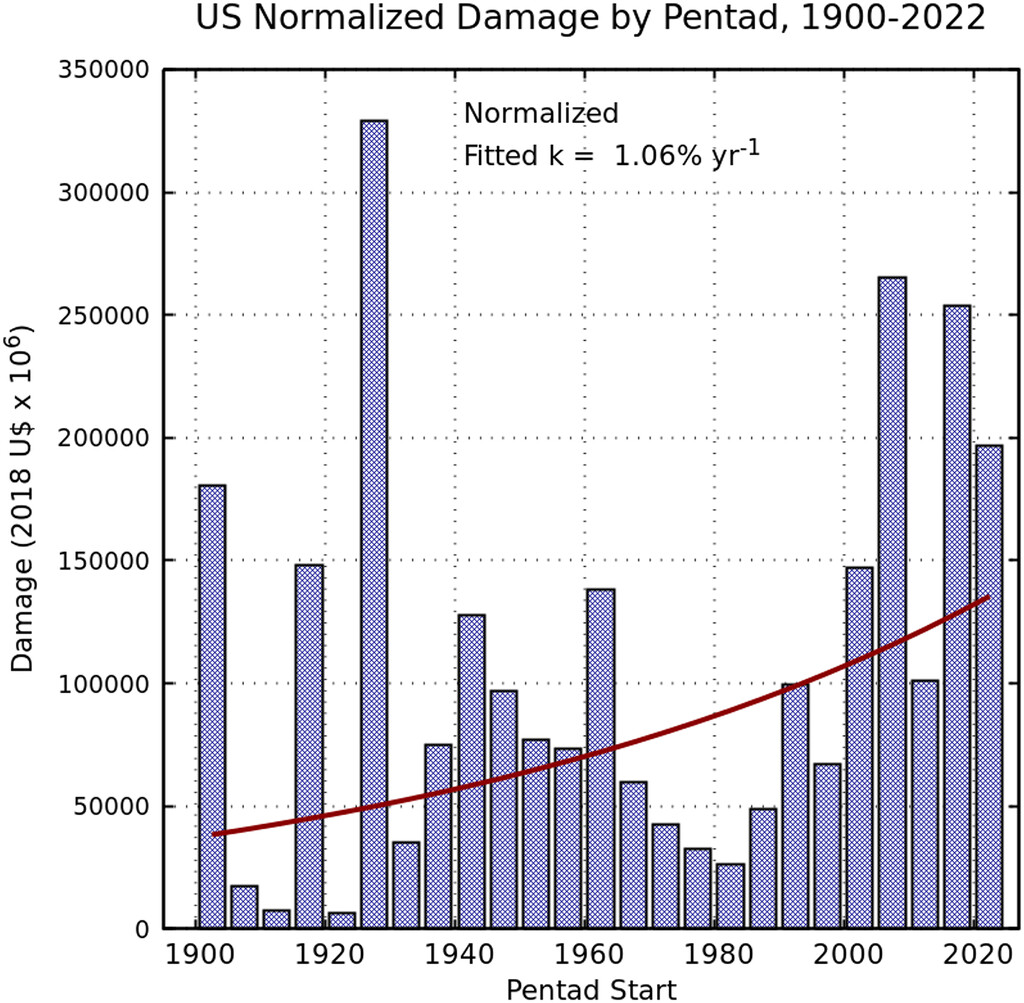
<figcaption>Figure 1: Change in tropical cyclone damages in U.S.
Atlantic coastal counties from 1900–2022, aggregated by pentad and
normalized to 2018 U.S. dollars. The red line shows an exponential trend
of 1.06%/yr growth in damages. Reproduced from <a
href="https://doi.org/10.1175/JAMC-D-24-0047.1">Willoughby, Hernandez,
&amp; Pinnock (2024)</a>.</figcaption>
</figure>

**In this problem**:

-   Describe two different mechanisms by which tropical cyclone damages
    in coastal counties might have increased over this period.
-   How might you propose to examine the relative strengths of these
    mechanisms? You don’t need to actually do this (this is indeed a
    somewhat thorny debate in the literature), but think about potential
    modeling and data approaches.

## References